In [433]:
import pandas as pd
import matplotlib.pyplot as plt

In [434]:
df = pd.read_excel("NFHS_5_Factsheets_Data.xls")

In [435]:
df.head()

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),...,Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women age 15-24 years who use hygienic methods of protection during their menstrual period26 (%),Ever-married women age 18-49 years who have ever experienced spousal violence27 (%),Ever-married women age 18-49 years who have experienced physical violence during any pregnancy (%),Young women age 18-29 years who experienced sexual violence by age 18 (%),Women age 15 years and above who use any kind of tobacco (%),Men age 15 years and above who use any kind of tobacco (%),Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%)
0,India,Urban,160138,179535,26420,82.51,23.14,985.28,924.35,93.3,...,80.93,69.36,89.37,24.19,2.51,1.1,5.44,28.82,0.58,16.53
1,India,Rural,476561,544580,75419,66.77,28.10,1037.29,930.94,87.53,...,77.43,46.61,72.32,31.63,3.41,1.64,10.49,42.69,1.61,19.92
2,India,Total,636699,724115,101839,71.76,26.52,1020.45,929.16,89.08,...,78.56,53.95,77.33,29.31,3.13,1.48,8.85,37.99,1.28,18.77
3,Andaman & Nicobar Islands,Urban,527,557,85,86.46,22.67,1022.74,941.04,96.86,...,88.48,80.79,98.47,23.19,-0.01,1.37,14.95,44.71,0.69,33.83
4,Andaman & Nicobar Islands,Rural,2097,1840,282,81.75,19.69,929.23,891.11,97.84,...,89.75,80.86,99.12,13.22,0.5,2.16,41.06,66.39,7.60,41.94


In [436]:
isna_dict = dict(df.isna().sum())
values = list(isna_dict.values())
keys = list(isna_dict.keys())

for i in range(len(values)):
    if values[i].item() != 0:
        print(keys[i])

In [437]:
df.shape

(111, 136)

In [438]:
print(list(df.columns))

['States/UTs', 'Area', 'Number of Households surveyed', 'Number of Women age 15-49 years interviewed', 'Number of Men age 15-54 years interviewed', 'Female population age 6 years and above who ever attended school (%)', 'Population below age 15 years (%)', ' Sex ratio of the total population (females per 1,000 males)', 'Sex ratio at birth for children born in the last five years (females per 1,000 males)', 'Children under age 5 years whose birth was registered with the civil authority (%)', 'Deaths in the last 3 years registered with the civil authority (%)', 'Population living in households with electricity (%)', 'Population living in households with an improved drinking-water source1 (%)', 'Population living in households that use an improved sanitation facility2 (%)', 'Households using clean fuel for cooking3 (%)', 'Households using iodized salt (%)', 'Households with any usual member covered under a health insurance/financing scheme (%)', 'Children age 5 years who attended pre-prim

In [439]:
df['Area'].value_counts()

Area
Urban    37
Rural    37
Total    37
Name: count, dtype: int64

In [440]:
df[df.select_dtypes(include=['number']).columns] = df.select_dtypes(include=['number']).abs()

In [441]:
import re

def remove_parentheses(val):
    if isinstance(val, str):
        val = val.strip()
        if re.match(r"^\(.*\)$", val):
            val = val[1:-1]
    return val

df = df.apply(lambda col: col.map(remove_parentheses))


In [442]:
import numpy as np

df = df.replace('*', np.nan)

for col in df.columns:
    if col not in ['States/UTs', 'Area']:
        for idx, val in df[col].items():
            if pd.isna(val):
                area = df.loc[idx, 'Area']
                
                india_value = df[(df['States/UTs'] == 'India') & (df['Area'] == area)][col].values
                
                if len(india_value) > 0:
                    df.at[idx, col] = india_value[0]


C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\1085012806.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('*', np.nan)


In [443]:
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols] = df[numerical_cols].abs()

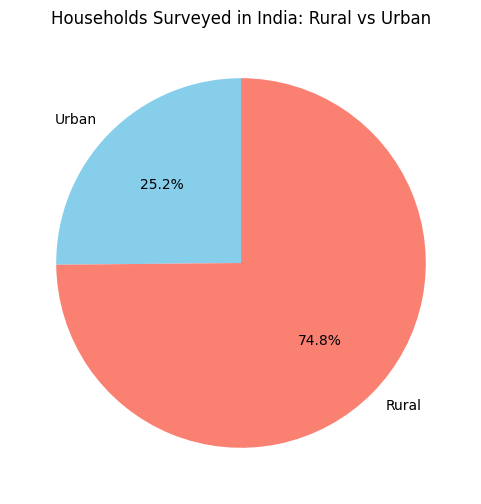

In [444]:
df_india = df[(df['States/UTs'] == "India") & (df['Area'].isin(["Rural","Urban"]))]

values = df_india['Number of Households surveyed']
labels = df_india['Area']

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue','salmon'])
plt.title("Households Surveyed in India: Rural vs Urban")
plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\2663709046.py:5: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_women = int(df_india[df_india['Area'] == 'Total']["Number of Women age 15-49 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\2663709046.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  total_men   = int(df_india[df_india['Area'] == 'Total']["Number of Men age 15-54 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\2663709046.py:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  rural_women = int(df_india[df_india['Area'] == 'Rural']["Number of Women age 15-49 years interviewed"])
C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\2663709046.py:9:

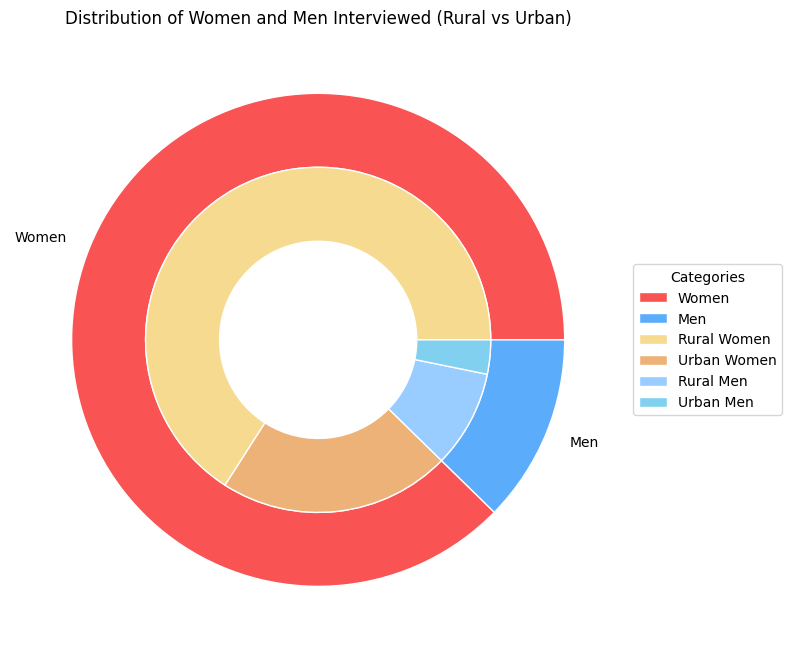

In [445]:
import matplotlib.pyplot as plt

df_india = df[(df['States/UTs'] == "India") & (df['Area'].isin(["Total", "Rural", "Urban"]))]

total_women = int(df_india[df_india['Area'] == 'Total']["Number of Women age 15-49 years interviewed"])
total_men   = int(df_india[df_india['Area'] == 'Total']["Number of Men age 15-54 years interviewed"])

rural_women = int(df_india[df_india['Area'] == 'Rural']["Number of Women age 15-49 years interviewed"])
urban_women = int(df_india[df_india['Area'] == 'Urban']["Number of Women age 15-49 years interviewed"])

rural_men   = int(df_india[df_india['Area'] == 'Rural']["Number of Men age 15-54 years interviewed"])
urban_men   = int(df_india[df_india['Area'] == 'Urban']["Number of Men age 15-54 years interviewed"])

outer_sizes = [total_women, total_men]
outer_labels = ["Women", "Men"]
outer_colors = ["#f95353", "#5cacfc"]

inner_sizes = [rural_women, urban_women, rural_men, urban_men]
inner_labels = ["Rural Women", "Urban Women", "Rural Men", "Urban Men"]
inner_colors = ["#f5da90", "#edb277", "#99ccff", "#81d0ef"]

fig, ax = plt.subplots(figsize=(8,8))

outer_wedges, _ = ax.pie(
    outer_sizes, labels=outer_labels, colors=outer_colors,
    radius=1, wedgeprops=dict(width=0.3, edgecolor='white')
)

inner_wedges, _ = ax.pie(
    inner_sizes, labels=None, colors=inner_colors,
    radius=0.7, wedgeprops=dict(width=0.3, edgecolor='white')
)

ax.legend(
    outer_wedges + inner_wedges, 
    outer_labels + inner_labels,
    title="Categories",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title("Distribution of Women and Men Interviewed (Rural vs Urban)")
plt.tight_layout()
plt.show()


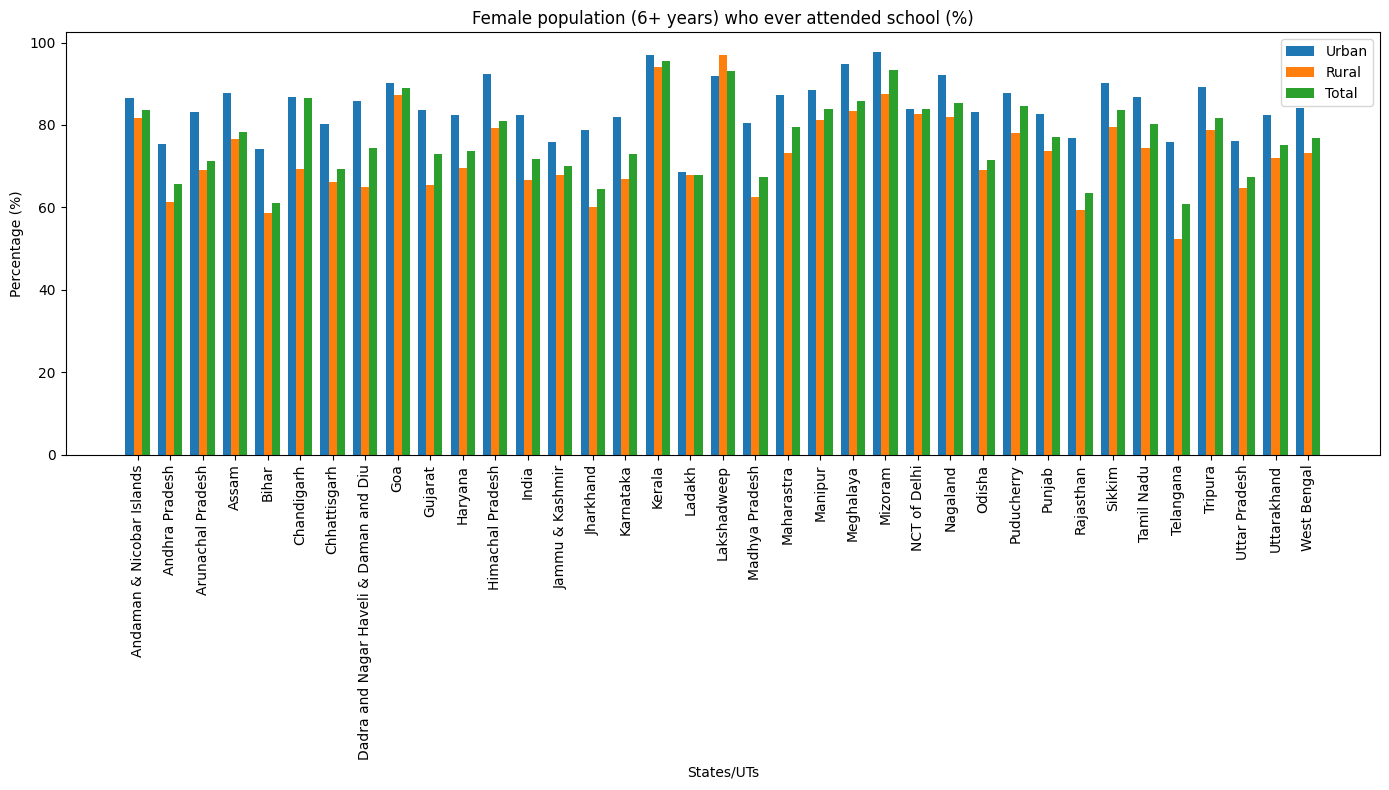

In [446]:
import matplotlib.pyplot as plt
import numpy as np

pivot_df = df.pivot(index="States/UTs", columns="Area", values="Female population age 6 years and above who ever attended school (%)")

pivot_df = pivot_df[["Urban", "Rural", "Total"]]

x = np.arange(len(pivot_df))
width = 0.25

fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(x - width, pivot_df["Urban"], width, label="Urban")
ax.bar(x, pivot_df["Rural"], width, label="Rural")
ax.bar(x + width, pivot_df["Total"], width, label="Total")

ax.set_xlabel("States/UTs")
ax.set_ylabel("Percentage (%)")
ax.set_title("Female population (6+ years) who ever attended school (%)")
ax.set_xticks(x)
ax.set_xticklabels(pivot_df.index, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()


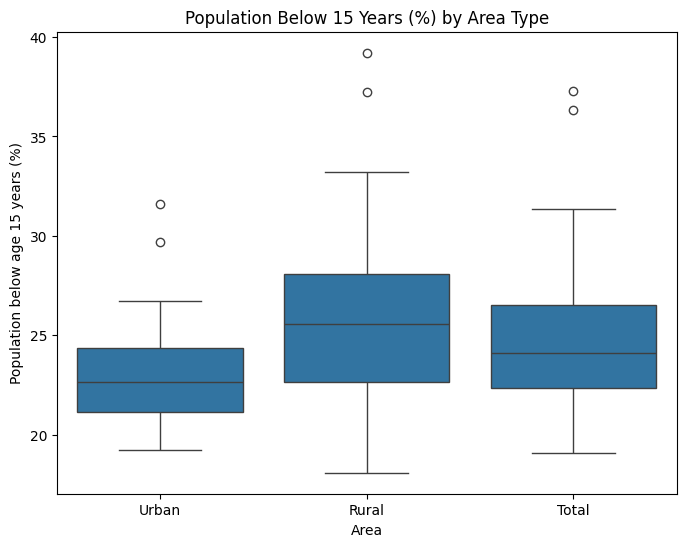

In [447]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='Area', y='Population below age 15 years (%)', data=df)
plt.title("Population Below 15 Years (%) by Area Type")
plt.show()

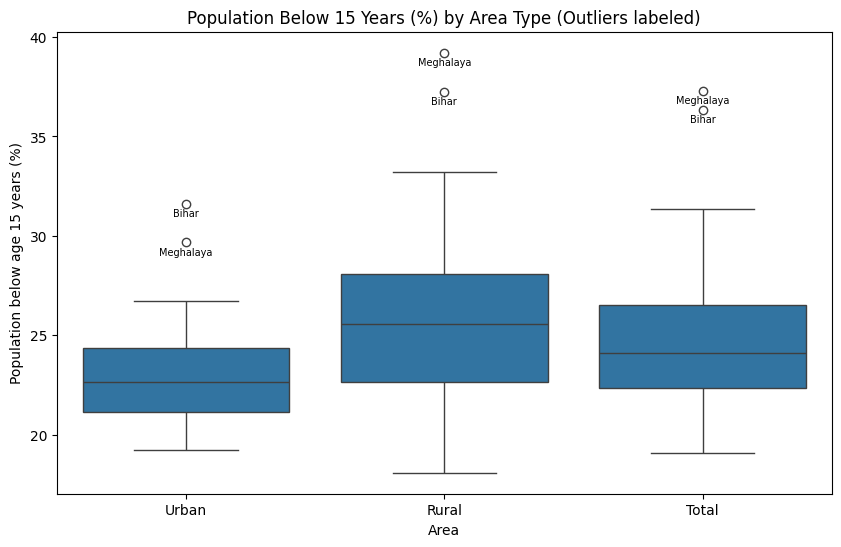

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns

col = 'Population below age 15 years (%)'

plt.figure(figsize=(10,6))
sns.boxplot(x='Area', y=col, data=df)

for area in df['Area'].unique():
    subset = df[df['Area'] == area]
    values = subset[col].astype(float)

    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = subset[(values < lower_bound) | (values > upper_bound)]

    for _, row in outliers.iterrows():
        plt.text(
            x = {'Rural':1, 'Urban':0, 'Total':2}[row['Area']],
            y = row[col]-0.75,
            s = row['States/UTs'],
            ha='center',
            va='bottom',
            fontsize=7,
            rotation=0,
            color='black'
        )

plt.title("Population Below 15 Years (%) by Area Type (Outliers labeled)")
plt.show()


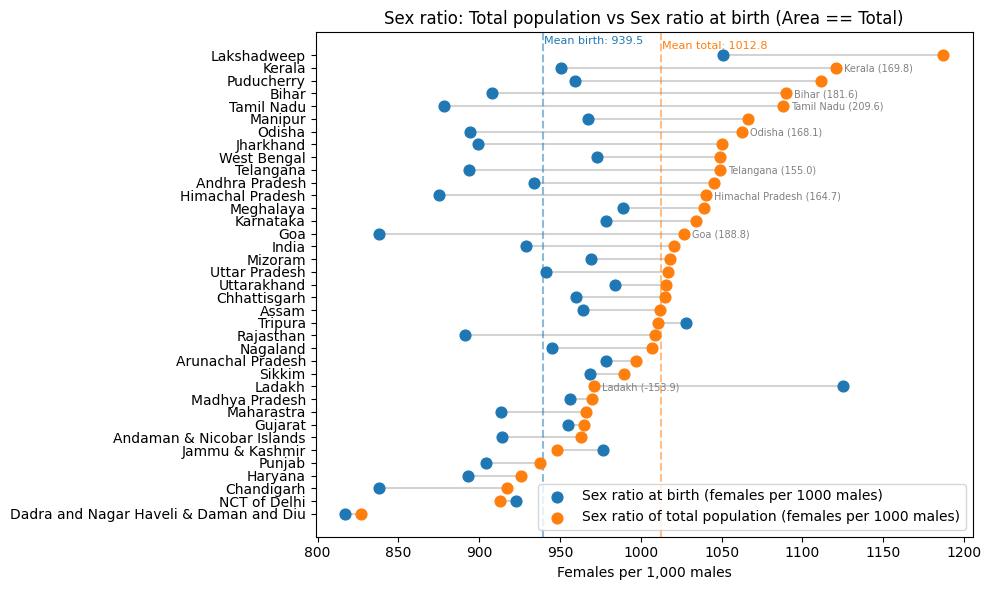

In [449]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- find the two matching columns robustly (handles small name differences / leading spaces) ---
col_total = next(c for c in df.columns if 'Sex ratio of the total population' in c)
col_birth = next(c for c in df.columns if 'Sex ratio at birth' in c)

# Filter to Area == 'Total' (robust to spaces/case)
df_total = df[df['Area'].astype(str).str.strip().str.lower() == 'total'].copy()

# convert to numeric, coerce errors to NaN
df_total[col_total] = pd.to_numeric(df_total[col_total], errors='coerce')
df_total[col_birth] = pd.to_numeric(df_total[col_birth], errors='coerce')

# drop rows missing either value
df_total = df_total.dropna(subset=[col_total, col_birth])

# sort by total population sex ratio for nicer ordering (you can change to col_birth if preferred)
df_total = df_total.sort_values(by=col_total, ascending=False).reset_index(drop=True)

# compute a helpful gap metric and pick top states to annotate
df_total['gap'] = df_total[col_total] - df_total[col_birth]
top_gaps = df_total.reindex(df_total['gap'].abs().sort_values(ascending=False).index).head(8)

# plotting
fig, ax = plt.subplots(figsize=(10, max(6, len(df_total)*0.15)))  # height scales with number of states

y = np.arange(len(df_total))

# gray connecting lines
ax.hlines(y, df_total[col_birth], df_total[col_total], color='lightgray', linewidth=1.5, zorder=1)

# markers
ax.scatter(df_total[col_birth], y, color='#1f77b4', s=60, label='Sex ratio at birth (females per 1000 males)', zorder=2)
ax.scatter(df_total[col_total], y, color='#ff7f0e', s=60, label='Sex ratio of total population (females per 1000 males)', zorder=3)

# Y labels = state names
ax.set_yticks(y)
ax.set_yticklabels(df_total['States/UTs'])
ax.invert_yaxis()  # highest on top

# axis labels / title / legend
ax.set_xlabel('Females per 1,000 males')
ax.set_title('Sex ratio: Total population vs Sex ratio at birth (Area == Total)')
ax.legend(loc='lower right')

for _, row in top_gaps.iterrows():
    idx = int(row.name)
    ax.text(row[col_total] + 5, idx + 0.06, f"{row['States/UTs']} ({row['gap']:.1f})", va='center', fontsize=7, color='gray')

# optional vertical reference lines
mean_total = df_total[col_total].mean()
mean_birth = df_total[col_birth].mean()
ax.axvline(mean_total, color='#ff7f0e', linestyle='--', alpha=0.5)
ax.axvline(mean_birth, color='#1f77b4', linestyle='--', alpha=0.5)
ax.text(mean_total + 0.5, -0.5, f"Mean total: {mean_total:.1f}", color='#ff7f0e', fontsize=8)
ax.text(mean_birth + 0.5, -0.9, f"Mean birth: {mean_birth:.1f}", color='#1f77b4', fontsize=8)

plt.tight_layout()
plt.show()


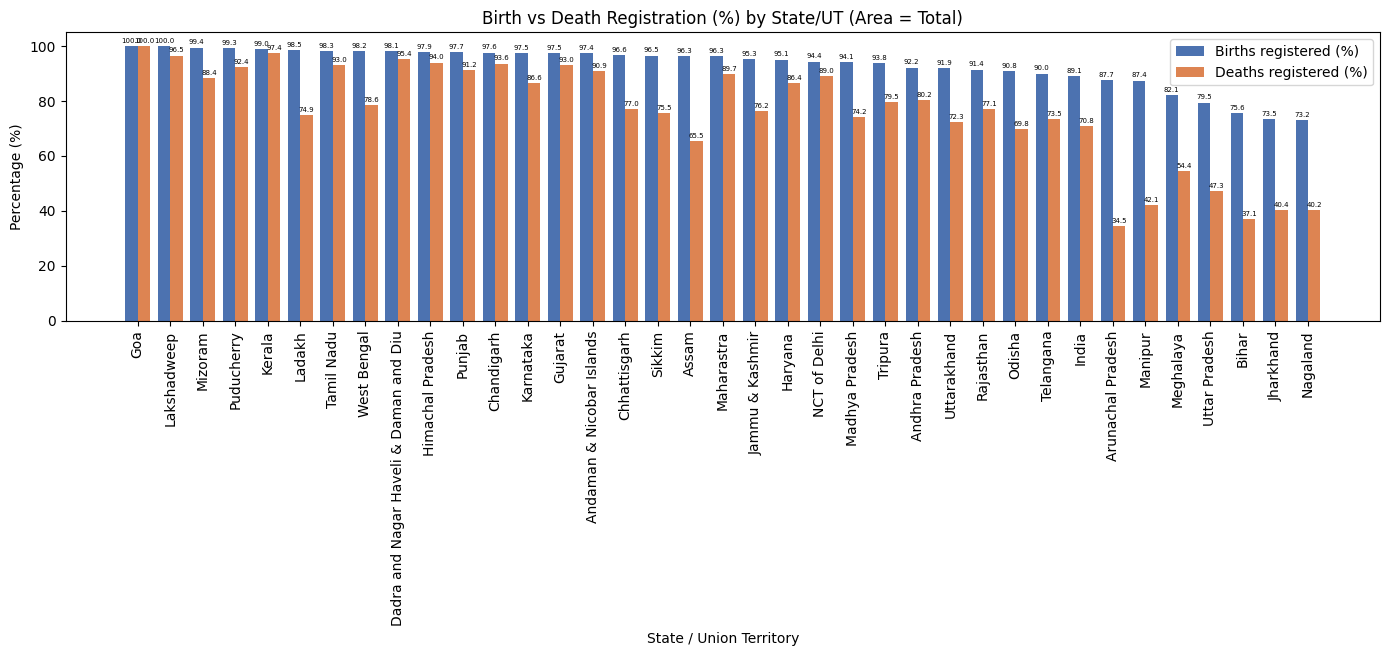

In [450]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- configure these if your column names differ slightly ---
col_birth_reg = next(c for c in df.columns if 'Children under age 5 years whose birth was registered' in c)
col_death_reg = next(c for c in df.columns if 'Deaths in the last 3 years registered' in c)

# Prepare a working DF filtered to Area == 'Total'
plot_df = df[df['Area'].astype(str).str.strip().str.lower() == 'total'][['States/UTs', col_birth_reg, col_death_reg]].copy()
plot_df.columns = ['State', 'birth_reg_pct', 'death_reg_pct']

# Clean text: remove '*' and surrounding parentheses and commas, then coerce to numeric
plot_df.replace('*', np.nan, inplace=True)
plot_df['birth_reg_pct'] = plot_df['birth_reg_pct'].astype(str).str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
plot_df['death_reg_pct'] = plot_df['death_reg_pct'].astype(str).str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
plot_df['birth_reg_pct'] = pd.to_numeric(plot_df['birth_reg_pct'], errors='coerce')
plot_df['death_reg_pct'] = pd.to_numeric(plot_df['death_reg_pct'], errors='coerce')

# Drop rows where both are missing
plot_df = plot_df.dropna(subset=['birth_reg_pct','death_reg_pct'], how='all').reset_index(drop=True)

# Optional: sort by birth registration (comment out if you want original order)
plot_df = plot_df.sort_values('birth_reg_pct', ascending=False).reset_index(drop=True)

# Plot settings
states = plot_df['State']
x = np.arange(len(states))
width = 0.38

fig, ax = plt.subplots(figsize=(14, max(6, len(states)*0.18)))

bars1 = ax.bar(x - width/2, plot_df['birth_reg_pct'], width, label='Births registered (%)', color='#4c72b0')
bars2 = ax.bar(x + width/2, plot_df['death_reg_pct'], width, label='Deaths registered (%)', color='#dd8452')

# Add value labels on top of bars (small font)
def autolabel(bars):
    for bar in bars:
        h = bar.get_height()
        if np.isnan(h):
            continue
        ax.text(bar.get_x() + bar.get_width()/2, h + 0.8, f'{h:.1f}', ha='center', va='bottom', fontsize=5)

autolabel(bars1)
autolabel(bars2)

# Labels, ticks, legend
ax.set_xlabel('State / Union Territory')
ax.set_ylabel('Percentage (%)')
ax.set_title('Birth vs Death Registration (%) by State/UT (Area = Total)')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90, ha='center')
ax.legend()

plt.tight_layout()
plt.show()


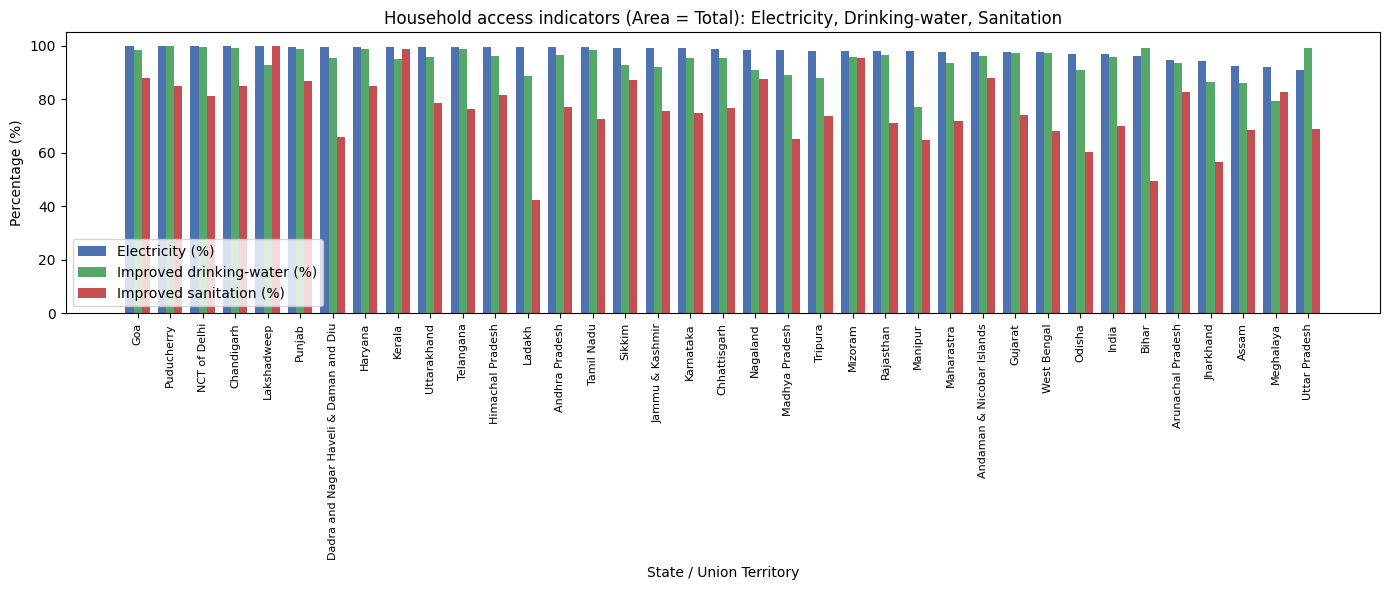

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- robust column lookup (change substrings if your headers differ) ---
col_elec = next(c for c in df.columns if 'Population living in households with electricity' in c)
col_water = next(c for c in df.columns if 'Population living in households with an improved drinking-water source' in c)
col_san = next(c for c in df.columns if 'Population living in households that use an improved sanitation facility' in c)

cols = [col_elec, col_water, col_san]

# Prepare dataframe for Area == 'Total'
work = df[df['Area'].astype(str).str.strip().str.lower() == 'total'][['States/UTs'] + cols].copy()
work = work.rename(columns={cols[0]: 'electricity_pct', cols[1]: 'water_pct', cols[2]: 'sanitation_pct'})

# Clean the three columns: remove '*', surrounding parentheses, commas; coerce to numeric
for c in ['electricity_pct','water_pct','sanitation_pct']:
    work[c] = work[c].astype(str).str.strip().replace({'*': np.nan})
    work[c] = work[c].str.replace(r'^\(|\)$', '', regex=True)  # drop surrounding parentheses
    work[c] = work[c].str.replace(',', '', regex=False)         # drop commas if any
    work[c] = pd.to_numeric(work[c], errors='coerce')

# Optional: drop rows where all three are missing
work = work.dropna(subset=['electricity_pct','water_pct','sanitation_pct'], how='all').reset_index(drop=True)

# Optional: sort states by electricity_pct (change to 'water_pct' or 'sanitation_pct' if you prefer)
work = work.sort_values('electricity_pct', ascending=False).reset_index(drop=True)

# Plot grouped bar chart
states = work['States/UTs'].tolist()
x = np.arange(len(states))
width = 0.25

fig, ax = plt.subplots(figsize=(14, max(6, len(states)*0.16)))

b1 = ax.bar(x - width,  work['electricity_pct'], width, label='Electricity (%)', color='#4c72b0')
b2 = ax.bar(x,          work['water_pct'],       width, label='Improved drinking-water (%)', color='#55a868')
b3 = ax.bar(x + width,  work['sanitation_pct'],  width, label='Improved sanitation (%)', color='#c44e52')

# Add numeric labels on top of bars (small font)
def autolabel(bars, fmt='{:.1f}'):
    for bar in bars:
        h = bar.get_height()
        if np.isnan(h):
            continue

autolabel(b1); autolabel(b2); autolabel(b3)

# Labels and formatting
ax.set_xlabel('State / Union Territory')
ax.set_ylabel('Percentage (%)')
ax.set_title('Household access indicators (Area = Total): Electricity, Drinking-water, Sanitation')
ax.set_xticks(x)
ax.set_xticklabels(states, rotation=90, fontsize=8)
ax.legend(loc='lower left')
plt.tight_layout()
plt.show()


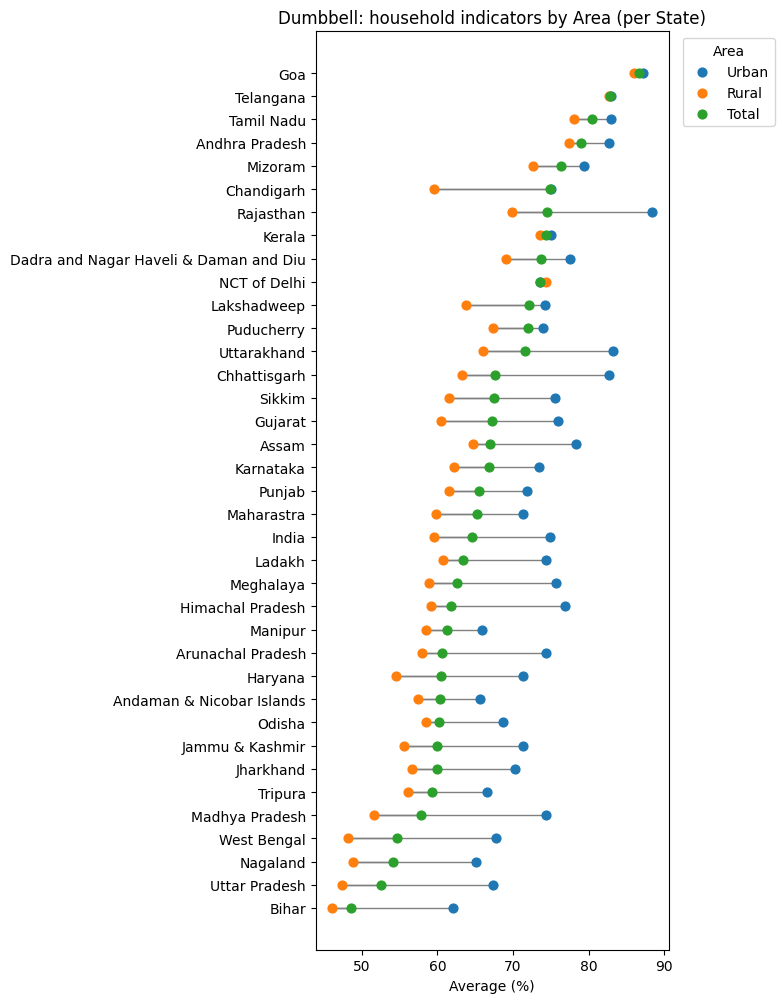

In [452]:
import pandas as pd, numpy as np

c1 = next(c for c in df.columns if 'Households using clean fuel for cooking' in c)
c2 = next(c for c in df.columns if 'Households using iodized salt' in c)
c3 = next(c for c in df.columns if 'Households with any usual member covered under a health insurance' in c)
cols = [c1, c2, c3]

work = df[['States/UTs','Area'] + cols].copy()
for c in cols:
    work[c] = work[c].astype(str).str.strip().replace({'*': np.nan})
    work[c] = work[c].str.replace(r'^\(|\)$', '', regex=True).str.replace(',', '', regex=False)
    work[c] = pd.to_numeric(work[c], errors='coerce')

work['household_ind_avg_pct'] = work[cols].mean(axis=1, skipna=True)

pivot = work.pivot(index='States/UTs', columns='Area', values='household_ind_avg_pct')

area_order = [a for a in ['Urban','Rural','Total'] if a in pivot.columns]
pivot = pivot[area_order]

if 'Total' in pivot.columns:
    pivot = pivot.sort_values('Total', ascending=False)
else:
    pivot = pivot.sort_values(pivot.columns[0], ascending=False)

plot_df = pivot.head(40).reset_index() 
areas = pivot.columns.tolist()         

import numpy as np
fig, ax = plt.subplots(figsize=(8, len(plot_df)*0.22 + 2))

y = np.arange(len(plot_df))
for i, a in enumerate(areas):
    ax.scatter(plot_df[a], y, s=40, label=a if i==0 else "", zorder=3) 

for idx, row in plot_df.iterrows():
    vals = row[areas].values
    ax.plot(vals, [idx]*len(vals), color='gray', linewidth=1, zorder=1)

ax.set_yticks(y)
ax.set_yticklabels(plot_df['States/UTs'])
ax.invert_yaxis()
ax.set_xlabel("Average (%)")
ax.set_title("Dumbbell: household indicators by Area (per State)")
ax.legend(areas, title='Area', bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\2528113051.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


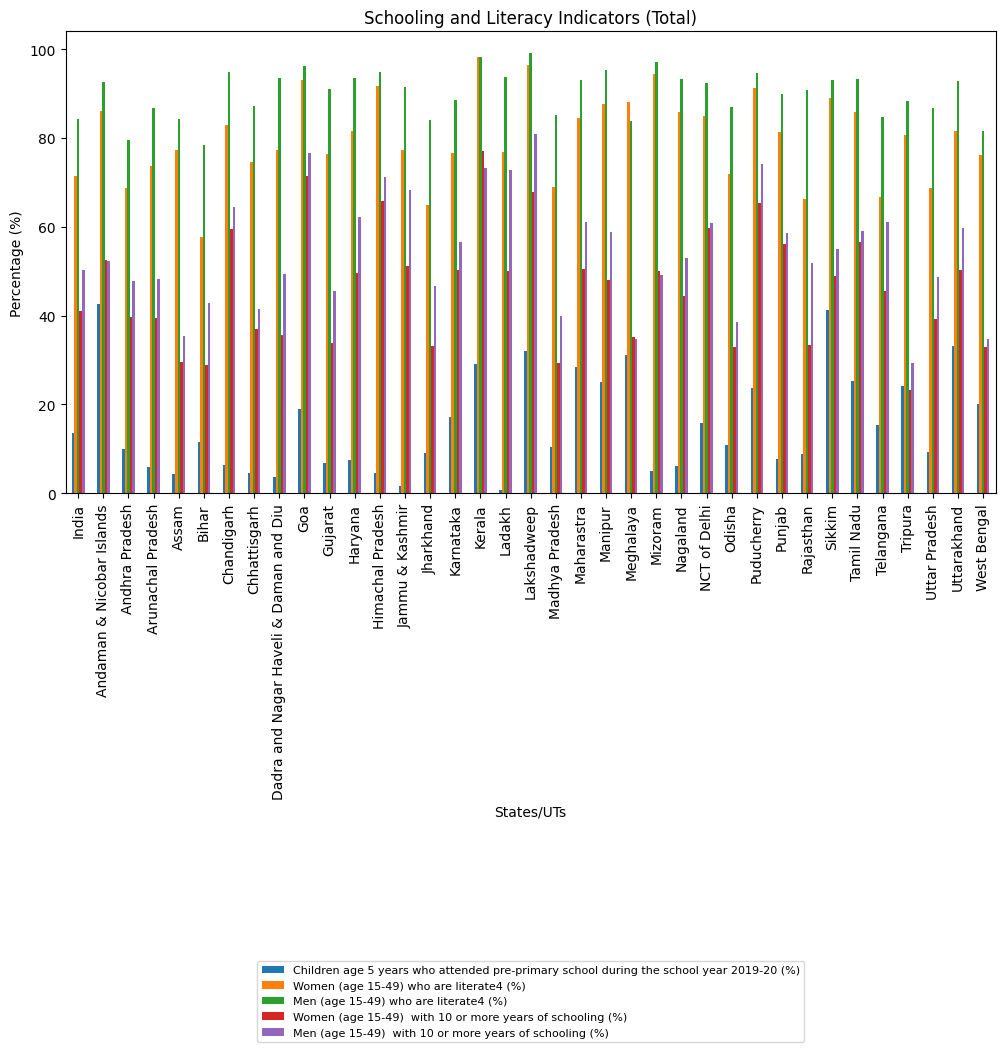

In [453]:
import matplotlib.pyplot as plt

cols = [
    'Children age 5 years who attended pre-primary school during the school year 2019-20 (%)',
    'Women (age 15-49) who are literate4 (%)',
    'Men (age 15-49) who are literate4 (%)',
    'Women (age 15-49)  with 10 or more years of schooling (%)',
    'Men (age 15-49)  with 10 or more years of schooling (%)'
]

df_total = df[df['Area'] == 'Total'][['States/UTs'] + cols]

df_total.set_index('States/UTs', inplace=True)

df_total.plot(kind='bar', figsize=(12,6))
plt.title("Schooling and Literacy Indicators (Total)")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=90)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -1),  # shift legend further down
    ncol=1,
    fontsize=8
)
plt.tight_layout()
plt.show()

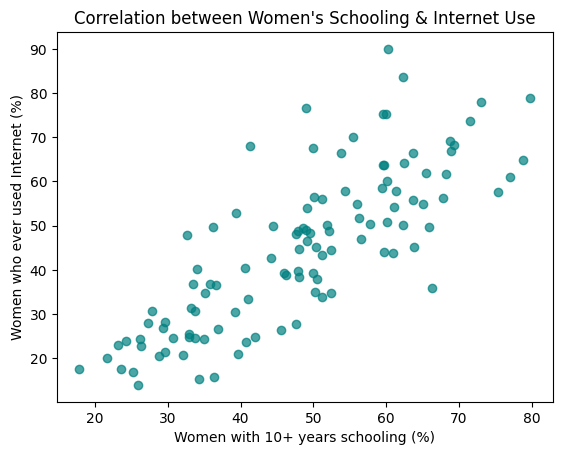

In [454]:
import matplotlib.pyplot as plt

plt.scatter(df["Women (age 15-49)  with 10 or more years of schooling (%)"], 
            df["Women (age 15-49)  who have ever used the internet (%)"], 
            color="teal", alpha=0.7)

plt.xlabel("Women with 10+ years schooling (%)")
plt.ylabel("Women who ever used Internet (%)")
plt.title("Correlation between Women's Schooling & Internet Use")

plt.show()

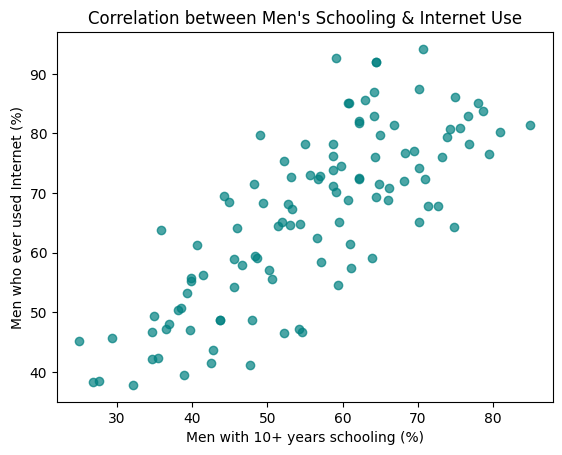

In [455]:
import matplotlib.pyplot as plt

plt.scatter(df["Men (age 15-49)  with 10 or more years of schooling (%)"], 
            df["Men (age 15-49)  who have ever used the internet (%)"], 
            color="teal", alpha=0.7)

plt.xlabel("Men with 10+ years schooling (%)")
plt.ylabel("Men who ever used Internet (%)")
plt.title("Correlation between Men's Schooling & Internet Use")

plt.show()

C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\1484166584.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1, skipna=True)
C:\Users\Gokul\AppData\Local\Temp\ipykernel_18152\1484166584.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Education_Mean'] = df[education_cols].mean(axis=1, skipna=True)


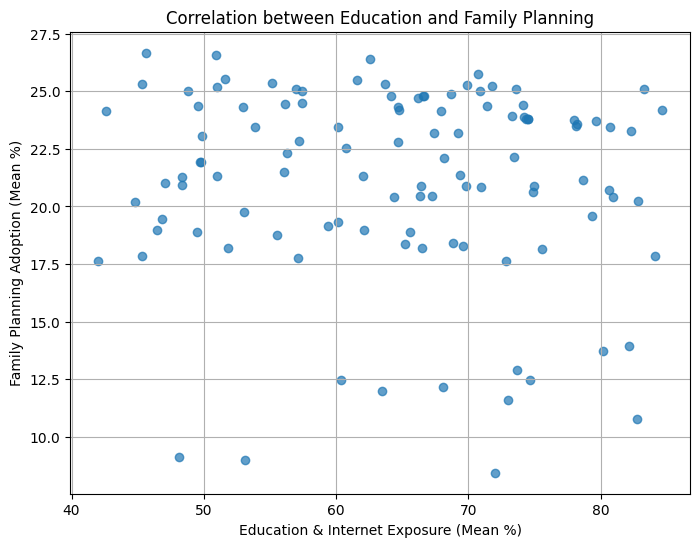

In [456]:
import matplotlib.pyplot as plt

# Define column groups
family_planning_cols = [
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any method6 (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Any modern method6 (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Female sterilization (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Male sterilization (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - IUD/PPIUD (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Pill (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Condom (%)',
    'Current Use of Family Planning Methods (Currently Married Women Age 15-49  years) - Injectables (%)'
]

education_cols = [
    'Women (age 15-49) who are literate4 (%)',
    'Men (age 15-49) who are literate4 (%)',
    'Women (age 15-49)  with 10 or more years of schooling (%)',
    'Men (age 15-49)  with 10 or more years of schooling (%)',
    'Women (age 15-49)  who have ever used the internet (%)',
    'Men (age 15-49)  who have ever used the internet (%)'
]

# Calculate mean for each category
df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1, skipna=True)
df['Education_Mean'] = df[education_cols].mean(axis=1, skipna=True)

# Scatterplot to see correlation
plt.figure(figsize=(8,6))
plt.scatter(df['Education_Mean'], df['FamilyPlanning_Mean'], alpha=0.7)
plt.xlabel("Education & Internet Exposure (Mean %)")
plt.ylabel("Family Planning Adoption (Mean %)")
plt.title("Correlation between Education and Family Planning")
plt.grid(True)
plt.show()


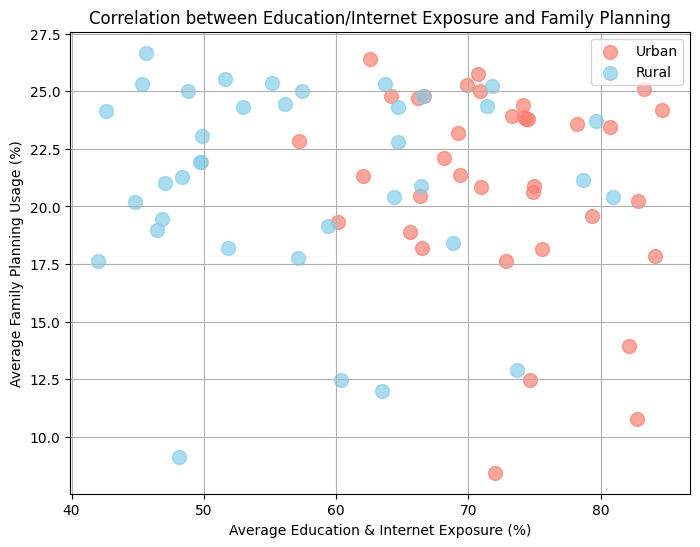

In [457]:
# Filter out the 'Total' row
df_plot = df[df['Area'].isin(['Rural', 'Urban'])]

df['FamilyPlanning_Mean'] = df[family_planning_cols].mean(axis=1)
df['Education_Mean'] = df[education_cols].mean(axis=1)

# Plotting
colors = {'Rural': 'skyblue', 'Urban': 'salmon'}

plt.figure(figsize=(8,6))
for area in df_plot['Area'].unique():
    subset = df_plot[df_plot['Area'] == area]
    plt.scatter(subset['Education_Mean'], subset['FamilyPlanning_Mean'], 
                color=colors[area], label=area, s=100, alpha=0.7)

plt.xlabel('Average Education & Internet Exposure (%)')
plt.ylabel('Average Family Planning Usage (%)')
plt.title('Correlation between Education/Internet Exposure and Family Planning')
plt.legend()
plt.grid(True)
plt.show()


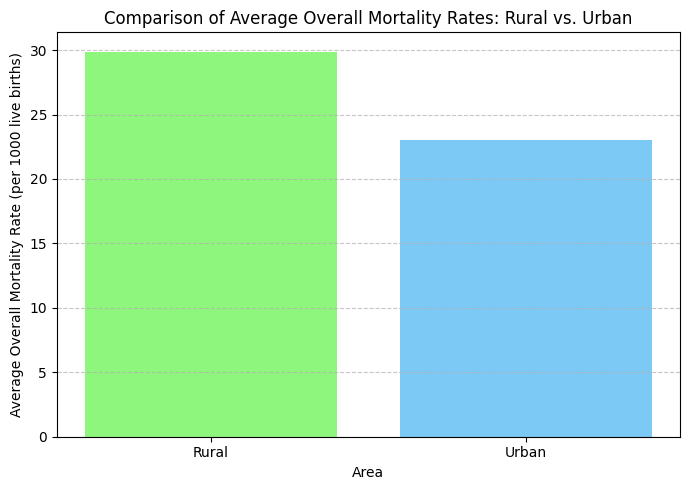

In [458]:
mortality_cols = [
    'Neonatal mortality rate (per 1000 live births)',
    'Infant mortality rate (per 1000 live births)',
    'Under-five mortality rate (per 1000 live births)'
]

# --- Chart 1: Combined Bar Chart for Rural vs Urban Average Mortality ---

# Filter out 'Total' and select only 'Rural' and 'Urban' areas
df_rural_urban = df[df['Area'].isin(['Rural', 'Urban'])].copy()

# Calculate the mean of the three mortality columns for each row
df_rural_urban['Overall Mortality Mean'] = df_rural_urban[mortality_cols].mean(axis=1)

# Group by Area and calculate the mean of the 'Overall Mortality Mean'
df_combined_mortality = df_rural_urban.groupby('Area')['Overall Mortality Mean'].mean()

# Define consistent colors for the plots
colors_area = {'Rural': "#8ff67d", 'Urban': "#7dc9f5"} # Green for Rural, Blue for Urban

# Create a single bar chart for Rural vs Urban
plt.figure(figsize=(7, 5)) # Adjusted figure size for a single chart
plt.bar(df_combined_mortality.index, df_combined_mortality.values,
        color=[colors_area[area] for area in df_combined_mortality.index])
plt.xlabel('Area')
plt.ylabel('Average Overall Mortality Rate (per 1000 live births)')
plt.title('Comparison of Average Overall Mortality Rates: Rural vs. Urban')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

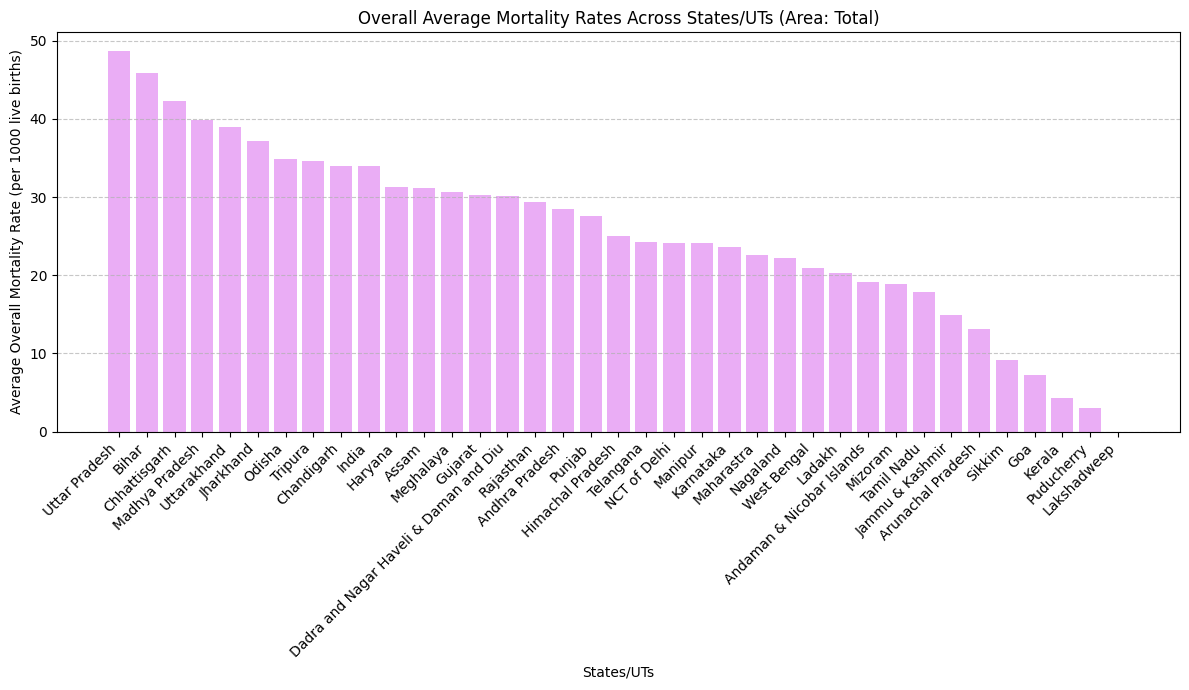

In [459]:
# Filter the DataFrame for Area == 'Total'
df_total_states = df[df['Area'] == 'Total'].copy()

# Calculate the mean of the three mortality columns for each state
df_total_states['Overall Mortality Mean'] = df_total_states[mortality_cols].mean(axis=1)

# Sort the states by their overall mortality mean for better visualization
df_total_states_sorted = df_total_states.sort_values(by='Overall Mortality Mean', ascending=False)

plt.figure(figsize=(12, 7)) # Adjusted figure size for state-wise plots
plt.bar(df_total_states_sorted['States/UTs'], df_total_states_sorted['Overall Mortality Mean'], color="#eaadf5") # Gray color for combined states plot
plt.xlabel('States/UTs')
plt.ylabel('Average Overall Mortality Rate (per 1000 live births)')
plt.title('Overall Average Mortality Rates Across States/UTs (Area: Total)')
plt.xticks(rotation=45, ha='right') # Rotate state names for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()